# Decision Trees

A Decision tree is a computational model that contains a set of if-then-else decisions to classify data. Its similar to program flow diagrams. For example a bank needs to be opened and the bank wants to know whether the economics such as income levels, number of already existing banks, location and other details that can affect its profitability are known. A decision tree helps to make such decisions based on existing data. The decision trees are used for classification prediction. Let us use the Titanic example to perform classification on who is likely to survive using Decision Trees. This will be a binary classifier but multi-decision classifiers can also be implemented. The advantage of Decision Trees are that they are interpretable.


The root node consists of the entire set of data. A segment or branch is formed by a splitting rule on the data above. A node which branches out is called a decision node. Bottom nodes which do not branch out are called leaves. Splitting rules are applied on each branch creating a hierarchy of branches which form the decision tree. Data points are assigned to nodes in a mutually exclusive manner. For each data point, the decision tree provides a unique path to enter the class that is defined by a leaf. So every data point in the dataset can be found in one leaf only. That leaf gives the probability or frequency of occurence.

Let us apply the decision tree model on the survival on Titanic.

```python
from sklearn import tree, metrics
from sklearn.cross_validation import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
```


### matplotlib.style.use('ggplot')
```python
pd.set_option("max_r",10)
```


## 1. Processed Titanic Data set

Earlier, in the course on EDA, we cleaned up the Titanic data set and introduced new columns that are easy to work with for classification and modeling purposes. We have saved those datasets on github. Load the clean dataset from GitHub:
```python
train_data = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Titanic/train_data.csv')
```
Choose all the features that are available and can be used for decision making on survival.
```python
features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female', 'male', 'Age_Imputed']
```
Using the train_test_split, we can split the data into training and testing data sets so we can evaluate the data.
```python
train_sample, test_sample = train_test_split(train_data, test_size=0.3, random_state=1)
```


## Exercise

Execute the below code to - 
* load libraries required to load data and apply a decision tree algorithm
* load the titanic data set
* use the train_test_split method to split the data into a training sample and a test sample

In [1]:
from sklearn import tree
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.style.use('ggplot')
pd.set_option("max_r",10)

train_data = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Titanic/train_data.csv')

features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female', 'male', 'Age_Imputed']

train_sample, test_sample = train_test_split(train_data, test_size=0.3, random_state=20052017)

# Instantiate a decision tree & fit it.

### Solution code

```python
# Just run above code
```

Now run the below code to -

* Instantiate a Decision Tree, using the DecisionTreeClassifier(random_state=) method that is imported from the tree module.
* use .fit() function with features and target as arguments.

In [2]:
titanic_tree = tree.DecisionTreeClassifier(random_state=2017)
titanic_tree.fit(train_sample[features], train_sample['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2017,
            splitter='best')

### Solution code

```python
# Just run above code
```

## 2. Predicting Survival on Titanic with Decision Trees

Import StringIO, Image and other libraries useful for visualizing the decision tree. 

```python
from sklearn.externals.six import StringIO
from IPython.display import Image

import pydotplus
```

Let us define a function that takes in a tree, features and other variables used to display the decision tree. 

```python
def visualize_tree(sktree, features, classes, impurity = False, label = 'all', proportion = True):
    dot_data=StringIO()
    tree.export_graphviz(sktree
                         , feature_names=features
                         , class_names=classes
                         , filled=True
                         , rounded=True
                         , impurity = impurity
                         , label = label
                         , special_characters=True
                         , proportion = proportion
                         , out_file=dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    #  graph.write_pdf("tree.pdf") # Save to your current folder
    return(Image(graph.create_png()))
```    


### Visualizing the Tree
```python
classes = ['Died', 'Survived']
visualize_tree(titanic_tree, features, classes)
```
<img style='float: left;' src='https://s3.amazonaws.com/rfjh/media/decision_trees.png'/>

As you can see above the tree is very complex. The reason was that we never specified any depth of the tree and hence the entire training data has been fit with no bounds to the parameters of the decision tree. Each decision tree has a depth that can control the complexity of the modeling. However, note that depth is a parameter that we need to determine for efficient modeling.


## Exercise

Execute the below code to -

* Pass in the random number using numpy with year 2017 as the seed.
* Visualize the tree.

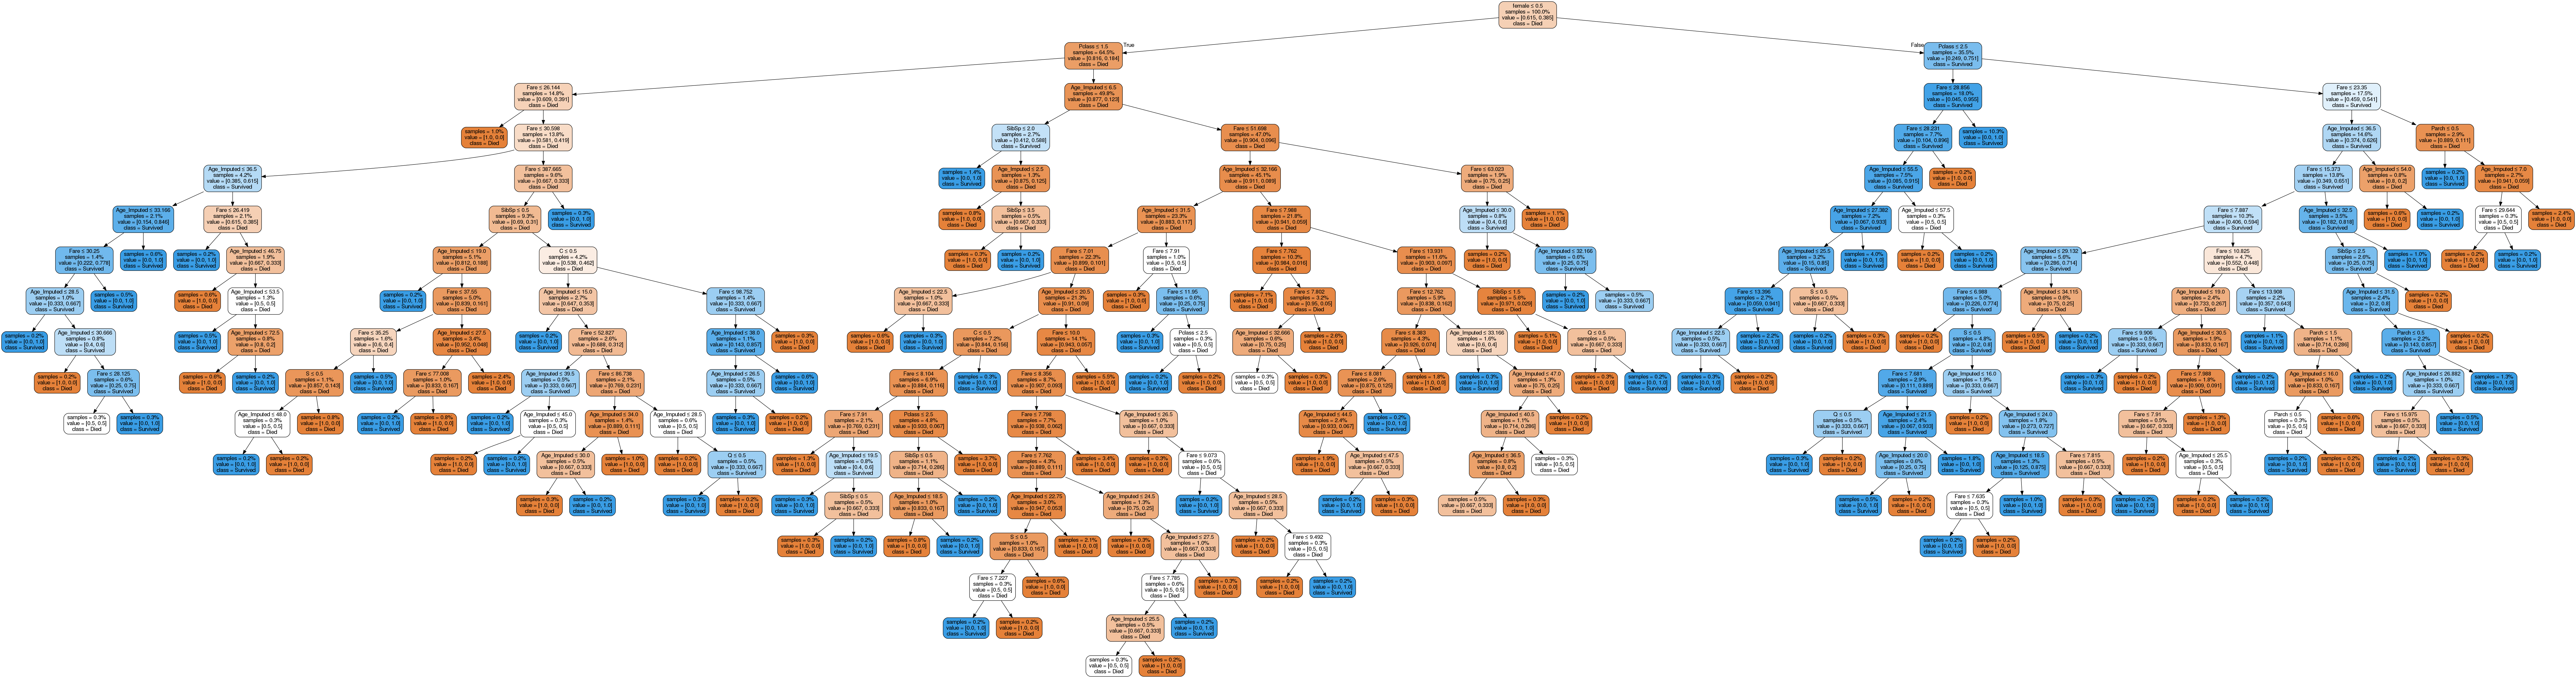

In [4]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import train_test_split

# Function to Visualize the tree
def visualize_tree(sktree, features, classes, impurity = False, label = 'all', proportion = True):
    dot_data=StringIO()
    tree.export_graphviz(sktree
                         , feature_names=features
                         , class_names=classes
                         , filled=True
                         , rounded=True
                         , impurity = impurity
                         , label = label
                         , special_characters=True
                         , proportion = proportion
                         , out_file=dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    #  graph.write_pdf("tree.pdf") # Save to your current folder
    return(Image(graph.create_png()))

classes = ['Died', 'Survived']
visualize_tree(titanic_tree, features, classes)

# Write code to instantiate, fit and visualize the tree.
# titanic_s_tree = tree.DecisionTreeClassifier(random_state = <random number>)


### Solution code

```python
# Just run above code
```

Now we will limit the depth of the tree to 2.

* Make a smaller tree that's easier to interpret with depth = 2 and fit the training sample.
* Visualize the tree.

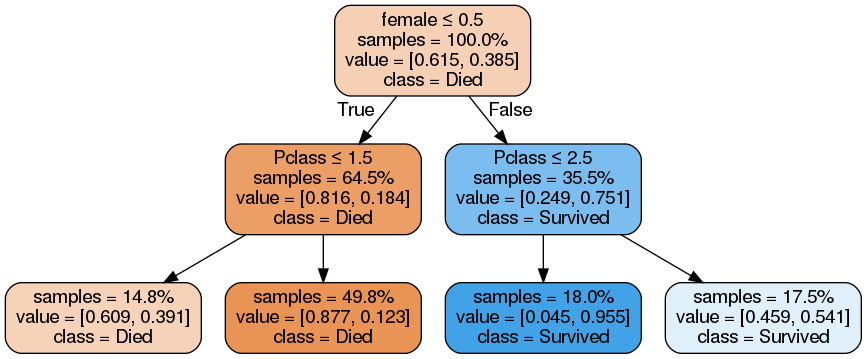

In [5]:
titanic_s_tree = tree.DecisionTreeClassifier(random_state = np.random.seed(2017), max_depth = 2)
titanic_s_tree.fit(train_sample[features], train_sample['Survived'])
visualize_tree(titanic_s_tree, features, classes, proportion = True)

### Solution code

```python
# Just run above code
```

## 3. Evaluating the Fit

Similar to the previous procedure of validating our models in supervised learning, we need to evaluate the accuracy of the decision tree that was fit. This can be done by using .predict() function and the accuracy score can be measured against the target variable:

```python
y_hat = titanic_s_tree.predict(train_sample[features])
metrics.accuracy_score(train_sample['Survived'], y_hat)
```


## Exercise

Execute the below code to -
* Evaluate the performance of the decision tree that you fit, on the test set and assign it to the variable, dt_accuracy
* Use metrics.accuracy_score()

In [8]:
y_hat = titanic_s_tree.predict(test_sample[features])
dt_accuracy = metrics.accuracy_score(test_sample['Survived'], y_hat)
print(dt_accuracy)

0.7723880597014925


### Solution code

```python
# Just run above code
```

## 4. ROC and Accuracy Metrics

Let us continue to visualize the tree with max_depth = 2:
```python
titanic_s_tree.fit(train_sample[features], train_sample['Survived'])
visualize_tree(titanic_s_tree, features, classes, proportion = True)
```

<img style='float: left;' src='https://s3.amazonaws.com/rfjh/media/decision_trees2.png'/>

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Interpretating the Tree

The tree first splits by sex, and then by class & age since it has learned during the training phase that these are the two most important features for determining survival. Passengers who might survive are shown in dark blue boxes. The people who died are shown in the orange box.


#### Evaluating Accuracy

Calculate accuracy of prediction on the training data.
```python
y_hat = titanic_s_tree.predict(train_sample[features])
metrics.accuracy_score(train_sample['Survived'], y_hat)
```

Evaluate the performance on the test set which generally is expected to be lower than the training data set.

```python
y_hat = titanic_s_tree.predict(test_sample[features])
metrics.accuracy_score(test_sample['Survived'], y_hat)
```

Let us look at the confusion matrix with True Positives, True Negatives, False Positives and False negatives using the pandas crosstab function:
```python
pd.crosstab(test_sample['Survived'], y_hat, rownames=['actual'], colnames=['prediction'])
```


## Exercise

Execute the below code to -

* Use predict_proba function that takes in the dataframe containing the features and assign to it class_probs
* Use the roc_auc_score function to predict the AUC score and assign it to the variable roc_score
* print out the ROC Score.

In [11]:
# Make predictions on the test set using predict_proba
class_probs = titanic_s_tree.predict_proba(test_sample[features])[:, 1]

# Calculate the AUC metric
roc_score = metrics.roc_auc_score(test_sample['Survived'], class_probs)
print(roc_score)

0.7991672572643516


### Solution code

```python
# Just run above code
```